## explore the semantic properties of its words

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [5]:
import  nltk
import  gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\Parth\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



#### Set up logging

In [7]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Download NLTK tokenizer models (only the first time)

In [8]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Prepare Corpus
Load books from file

In [11]:
book_filenames = sorted(glob.glob("C://Users//Parth//Desktop//NLP//*.txt"))

In [12]:
print("Found books:")
book_filenames

Found books:


['C://Users//Parth//Desktop//NLP\\got1.txt',
 'C://Users//Parth//Desktop//NLP\\got2.txt',
 'C://Users//Parth//Desktop//NLP\\got3.txt',
 'C://Users//Parth//Desktop//NLP\\got4.txt',
 'C://Users//Parth//Desktop//NLP\\got5.txt']

## Combine the books into one string

In [13]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'C://Users//Parth//Desktop//NLP\got1.txt'...
Corpus is now 1770659 characters long

Reading 'C://Users//Parth//Desktop//NLP\got2.txt'...
Corpus is now 4071041 characters long

Reading 'C://Users//Parth//Desktop//NLP\got3.txt'...
Corpus is now 6391405 characters long

Reading 'C://Users//Parth//Desktop//NLP\got4.txt'...
Corpus is now 8107945 characters long

Reading 'C://Users//Parth//Desktop//NLP\got5.txt'...
Corpus is now 9719485 characters long



## Split the corpus into sentences

In [14]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [15]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [18]:
raw_sentences[:10]

['This edition contains the complete text of the original hardcover edition.',
 'NOT ONE WORD HAS BEEN OMITTED.',
 'A CLASH OF KINGS\n\nA Bantam Spectra Book\n\nPUBLISHING HISTORY\n\nBantam Spectra hardcover edition published February 1999\n\nBantam Spectra paperback edition / September 2000\n\nSPECTRA and the portrayal of a boxed “s” are trademarks of Bantam Books, a division of Random House, Inc.\n\nAll rights reserved.',
 'Copyright © 1999 by George R. R. Martin.',
 'Maps by James Sinclair.',
 'Heraldic crest by Virginia Norey.',
 'Library of Congress Catalog Card Number: 98-37954.',
 'No part of this book may be reproduced or transmitted in any form or by any means, electronic or mechanical, including photocopying, recording, or by any information storage and retrieval system, without permission in writing from the publisher.',
 'Visit our website at www.bantamdell.com\n\nBantam Books, the rooster colophon, Spectra and the portrayal of a boxed “s” are registered trademarks of Rando

In [20]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [21]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [22]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [23]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


## Train word2vec

In [24]:

#ONCE we have vectors#ONCE we 
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [25]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [27]:

thrones2vec.build_vocab(sentences)

2018-07-24 11:20:48,948 : INFO : collecting all words and their counts
2018-07-24 11:20:48,950 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-24 11:20:49,006 : INFO : PROGRESS: at sentence #10000, processed 140984 words, keeping 10280 word types
2018-07-24 11:20:49,059 : INFO : PROGRESS: at sentence #20000, processed 279730 words, keeping 13558 word types
2018-07-24 11:20:49,116 : INFO : PROGRESS: at sentence #30000, processed 420336 words, keeping 16598 word types
2018-07-24 11:20:49,174 : INFO : PROGRESS: at sentence #40000, processed 556581 words, keeping 18324 word types
2018-07-24 11:20:49,233 : INFO : PROGRESS: at sentence #50000, processed 686247 words, keeping 19714 word types
2018-07-24 11:20:49,290 : INFO : PROGRESS: at sentence #60000, processed 828497 words, keeping 21672 word types
2018-07-24 11:20:49,349 : INFO : PROGRESS: at sentence #70000, processed 973830 words, keeping 23093 word types
2018-07-24 11:20:49,407 : INFO : PROGRESS: at 

In [31]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))

Word2Vec vocabulary length: 17277


### Start training, this might take a minute or two...

In [50]:
thrones2vec.train(sentences, epochs=thrones2vec.epochs, total_examples=thrones2vec.corpus_count)

ValueError: You must specify an explict epochs count. The usual value is epochs=model.epochs.

In [55]:
token_count = sum([len(sentence) for sentence in sentences])
thrones2vec.train(sentences, total_examples = token_count, epochs = 10)

2018-07-24 11:51:40,869 : INFO : training model with 4 workers on 17277 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-07-24 11:51:42,025 : INFO : EPOCH 1 - PROGRESS: at 0.66% examples, 129340 words/s, in_qsize 7, out_qsize 0
2018-07-24 11:51:43,054 : INFO : EPOCH 1 - PROGRESS: at 1.48% examples, 143455 words/s, in_qsize 8, out_qsize 0
2018-07-24 11:51:44,062 : INFO : EPOCH 1 - PROGRESS: at 2.38% examples, 152008 words/s, in_qsize 7, out_qsize 0
2018-07-24 11:51:45,085 : INFO : EPOCH 1 - PROGRESS: at 3.19% examples, 151702 words/s, in_qsize 8, out_qsize 0
2018-07-24 11:51:46,144 : INFO : EPOCH 1 - PROGRESS: at 3.98% examples, 151983 words/s, in_qsize 8, out_qsize 0
2018-07-24 11:51:47,172 : INFO : EPOCH 1 - PROGRESS: at 4.81% examples, 154180 words/s, in_qsize 7, out_qsize 0
2018-07-24 11:51:48,209 : INFO : EPOCH 1 - PROGRESS: at 5.69% examples, 154443 words/s, in_qsize 8, out_qsize 0
2018-07-24 11:51:49,229 : INFO : EPOCH 1 - PROGRESS: at 6.52% exam

(14046567, 18181030)

#### Save to file, can be useful later

In [56]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [57]:
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2018-07-24 11:54:37,907 : INFO : saving Word2Vec object under trained\thrones2vec.w2v, separately None
2018-07-24 11:54:37,910 : INFO : not storing attribute vectors_norm
2018-07-24 11:54:37,913 : INFO : not storing attribute cum_table
2018-07-24 11:54:39,171 : INFO : saved trained\thrones2vec.w2v


### Explore the trained model.

In [58]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

2018-07-24 11:55:11,266 : INFO : loading Word2Vec object from trained\thrones2vec.w2v
2018-07-24 11:55:11,822 : INFO : loading wv recursively from trained\thrones2vec.w2v.wv.* with mmap=None
2018-07-24 11:55:11,823 : INFO : setting ignored attribute vectors_norm to None
2018-07-24 11:55:11,825 : INFO : loading vocabulary recursively from trained\thrones2vec.w2v.vocabulary.* with mmap=None
2018-07-24 11:55:11,826 : INFO : loading trainables recursively from trained\thrones2vec.w2v.trainables.* with mmap=None
2018-07-24 11:55:11,829 : INFO : setting ignored attribute cum_table to None
2018-07-24 11:55:11,831 : INFO : loaded trained\thrones2vec.w2v


## Compress the word vectors into 2D space and plot them

In [59]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [72]:
all_word_vectors_matrix  = thrones2vec.syn0_lockf

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `syn0_lockf` (Attribute will be removed in 4.0.0, use self.trainables.vectors_lockf instead).
  if __name__ == '__main__':


In [76]:
print(all_word_vectors_matrix)

[1. 1. 1. ... 1. 1. 1.]


In [77]:
np.isfinite(all_word_vectors_matrix).all()

True

In [80]:
np.isnan(all_word_vectors_matrix).any()

False

In [81]:
np.isinf(all_word_vectors_matrix).all()

False

## Train t-SNE, this could take a minute or two...

In [83]:
all_word_vectors_matrix = all_word_vectors_matrix.reshape(-1,1)
all_word_vectors_matrix_2d  = tsne.fit_transform(all_word_vectors_matrix)

### Plot the big picture

In [88]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [89]:
points.head(10)

,word,x,y
0,This,0.093746,0.655058
1,edition,0.093747,0.655075
2,the,0.093752,0.655075
3,complete,0.093747,0.655071
4,of,0.093754,0.655125
5,original,0.093754,0.655116
6,hardcover,0.093753,0.655111
7,ONE,0.093745,0.655076
8,A,0.093750,0.655075
9,OF,0.093737,0.655066


In [90]:
sns.set_context("poster")


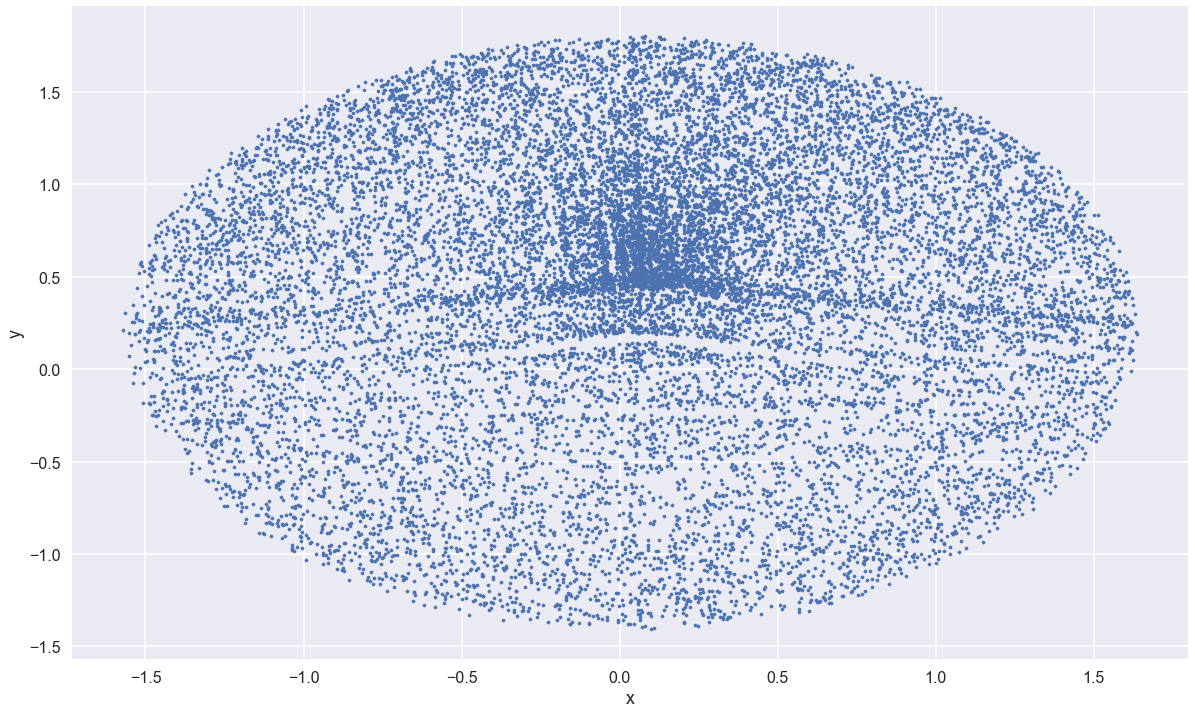

In [91]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

## Zoom in to some interesting places

In [111]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=10, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

## ## People related to Kingsguard ended up together

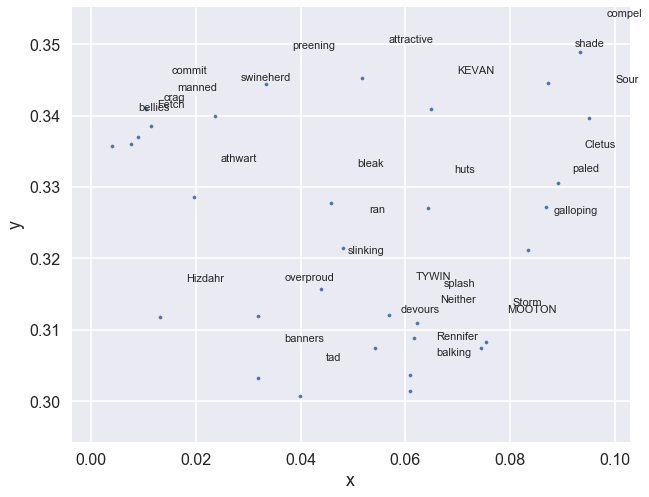

In [114]:
plot_region(x_bounds=(0.0, 0.1), y_bounds=(0.3, 0.35))

### Explore semantic similarities between book characters
### Words closest to the given word

In [115]:
thrones2vec.most_similar("Stark")

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-07-24 13:57:26,338 : INFO : precomputing L2-norms of word weight vectors
C:\Users\Parth\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Eddard', 0.7118152976036072),
 ('executed', 0.5803807377815247),
 ('Edrick', 0.5367369651794434),
 ('Harlon', 0.5346566438674927),
 ('Bolton', 0.526170015335083),
 ('Ned', 0.5256360769271851),
 ('Lyanna', 0.5209145545959473),
 ('Winterfell', 0.5191464424133301),
 ('Catelyn', 0.5164938569068909),
 ('Robb', 0.5121216177940369)]

In [116]:
thrones2vec.most_similar("Aerys")

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\Users\Parth\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Jaehaerys', 0.692448616027832),
 ('Mad', 0.66243577003479),
 ('Defiance', 0.6581012010574341),
 ('Unlikely', 0.6509232521057129),
 ('V', 0.6453781127929688),
 ('Conciliator', 0.6427005529403687),
 ('Daeron', 0.6398159265518188),
 ('reign', 0.6361129283905029),
 ('II', 0.6319588422775269),
 ('Maekar', 0.6266558170318604)]

In [117]:
thrones2vec.most_similar("direwolf")

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\Users\Parth\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('SHAGGYDOG', 0.588774561882019),
 ('Ghost', 0.5885558128356934),
 ('wolf', 0.5762768983840942),
 ('pup', 0.5597366094589233),
 ('Rickon', 0.5584369897842407),
 ('GHOST', 0.5494930744171143),
 ('Shaggydog', 0.5235009789466858),
 ('OSHA', 0.5215811729431152),
 ('crannogman', 0.5187574625015259),
 ('Reed', 0.5060182213783264)]

In [120]:
thrones2vec.most_similar("Daeron")

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\Users\Parth\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('V', 0.8801000118255615),
 ('Maekar', 0.8576845526695251),
 ('Jaehaerys', 0.8547546863555908),
 ('Unlikely', 0.8533545732498169),
 ('Unworthy', 0.8518051505088806),
 ('Conciliator', 0.8092786073684692),
 ('RHAENYS', 0.8057378530502319),
 ('Third', 0.8051660060882568),
 ('Rhaenyra', 0.7996232509613037),
 ('Aerion', 0.7957280874252319)]


## Linear relationships between word pairs

In [121]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [127]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")
nearest_similarity_cosmul("King", "Throne", "Queen")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as mulled is related to wine
Arya is related to Nymeria, as humble is related to dragons
King is related to Throne, as Landing is related to Queen


C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


'Landing'